## Identify The Sentiments-Practice Problem

Problem Statement: Based on the tweet data to predict sentiment on electronic products of netizens.


In [2]:
# import the required libraries
import pandas as pd
import re
pd.set_option("display.max_colwidth",200)
import numpy as np
import seaborn as sns
import string
import nltk # for text manipulation
import warnings
warnings.filterwarnings("ignore",category =DeprecationWarning)
import matplotlib.pyplot as plt
%matplotlib inline



### Lets read the data sets

In [3]:
train_data = pd.read_csv('../Resources/train_2kmZucJ.csv')
test_data = pd.read_csv('../Resources/test_oJQbWVk.csv')

In [6]:
# view first 5 records
train_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [7]:
test_data.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for


## Data preprocessing and Cleaning


In [8]:
#Check the positive tweets labels as Zero
train_data[train_data['label']== 0].head(15)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
6,7,0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/
7,8,0,New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE 2018 #NewYear #Starting 2018 #recipes #...
8,9,0,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollow… http://instagr.am/p/Vj6bg5tLql/
9,10,0,Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor... http://tmblr.co/ZAjC0n1ms_Gp8
13,14,0,"I just made another crazy purchase lol my theory is 'Work hard, Play Hard' Lol #iPad #Apple #Shopping http://instagr.am/p/NUyFHvyE7I/"
15,16,0,From #DeepEllum towards #downtown #Dallas. #BigD #Saturday #RX100M3 #Sony #summer #urban http://instagram.com/p/pzJoOaQqZ4/


In [9]:
#check the negative tweets labeled as one
train_data[train_data['label']== 1].tail(15)

,id,label,tweet
7858,7859,1,You have got to be kidding me?!?!?!?!? #SonOfA$&@*# #Fuck #$&@*# #Apple #ImMad http://instagram.com/p/eahjWOhX05/
7862,7863,1,U Apple if you haven’t noticed your update sucks COCK! $&@*# is just getting worse. #iOS11 #apple #iphone #ios1111 #iosdowndate #gettinreadytochuckthisphone
7867,7868,1,"In other news, my iPod has developed yet another fault. >.< #ipoo"
7883,7884,1,Fake sale #VivoSucks just wanted to get traffic on their site
7884,7885,1,iPhone 7 is literally the worst phone. Pointless! You can't charge your phone & listen to music the same time. #Apple
7889,7890,1,Okie phone you can die in like two minutes #cool iphone
7890,7891,1,Okay I upgraded my phone to an iPhone 6 s & IT DOESNT HAVE AN HEADPHONE/AUX JACK?! #wtfapple #Apple
7895,7896,1,"@KhalSir same here. Have to fork out £120 for a new battery and repair... ""ehhmm, NO thanks, #Samsung"""
7896,7897,1,"So pissed! Macbook crashes, Apple Company does nothing! #apple #macbook #appleis$&@*# #pissed #applesucks #ripoff #$&@*# #apple"
7897,7898,1,"Slowly moving away from shitty Apple. Goodbye Apple Music , hello Spotify"


#### Check the dimensions of the train and test dataset

In [10]:
train_data.shape ,test_data.shape

((7920, 3), (1953, 2))

 Train set has 7920 twwets and Test set has 1953 tweets.
 
 Let's have a glimpse at label-distribution in the train dataset

In [11]:
train_data['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

Now we will check the distribution of length of the tweets,in terms of words , in both train and test data.


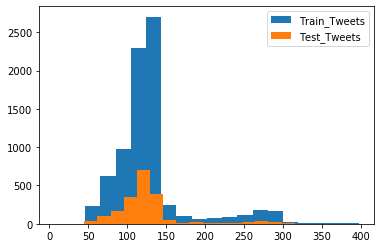

In [12]:
#plot the histogram to see the how the data is distributed
len_train_data = train_data['tweet'].str.len()
len_test_data = test_data['tweet'].str.len()

plt.hist(len_train_data,bins =20 ,label ="Train_Tweets")
plt.hist(len_test_data,bins =20,label ="Test_Tweets")
plt.legend()
plt.show()


Tweets lengths are more compared to the test data.

## Data Cleaning

In [13]:
combined_data = train_data.append(test_data,ignore_index = True)

C:\Users\Viswajani\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [14]:
combined_data.shape

(9873, 3)

Given below is the user-defined function to remove the unwanted text patterns from the tweet


In [15]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i, '',input_txt)
    return input_txt

 Removing Twitter Handles(@user)

In [16]:
combined_data['tidy_tweet'] = np.vectorize(remove_pattern)(combined_data['tweet'],"@[\w]*")

In [17]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


2.Removing punctuations,numbers and special characters

In [18]:
combined_data['tidy_tweet'] = combined_data['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [19]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https goo gl h MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally a transparant silicon case Thanks to my uncle #yay #Sony #Xperia #S #sonyexperias http instagram com p YGEt JC JM
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,We love this Would you go #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect http fb me N LsUpCu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,I m wired I know I m George I was made that way #iphone #cute #daventry #home http instagr am p Li ujS k
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple won t even talk to me about a question I have unless I pay them for their stupid support


3.Removing the short words


In [20]:
combined_data['tidy_tweet'] = combined_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [21]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #Pregnancy Test https MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,Finally transparant silicon case Thanks uncle #yay #Sony #Xperia #sonyexperias http instagram YGEt
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this Would #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect http LsUpCu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know George made that #iphone #cute #daventry #home http instagr
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,What amazing service Apple even talk about question have unless them their stupid support


4.Text Normalization

Here we will use nltk's porterstemmer() function to normalize the tweets.But  brfore that we will have to tokenize the tweets.Tokens are individual terms or words,and tokenization is the process of splitting a string of text into tokens

In [22]:
tokenized_tweet =combined_data['tidy_tweet'].apply(lambda x: x.split())

In [23]:
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, #android, #apps, #beautiful, #cute, #health, #igers, #iphoneonly, #iphonesia, #iphone]
1                        [Finally, transparant, silicon, case, Thanks, uncle, #yay, #Sony, #Xperia, #sonyexperias, http, instagram, YGEt]
2                         [love, this, Would, #talk, #makememories, #unplug, #relax, #iphone, #smartphone, #wifi, #connect, http, LsUpCu]
3                                                      [wired, know, George, made, that, #iphone, #cute, #daventry, #home, http, instagr]
4                                [What, amazing, service, Apple, even, talk, about, question, have, unless, them, their, stupid, support]
Name: tidy_tweet, dtype: object

In [24]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet =tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [25]:
tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #android, #app, #beauti, #cute, #health, #iger, #iphoneonli, #iphonesia, #iphon]
1                        [final, transpar, silicon, case, thank, uncl, #yay, #soni, #xperia, #sonyexperia, http, instagram, yget]
2                      [love, thi, would, #talk, #makememori, #unplug, #relax, #iphon, #smartphon, #wifi, #connect, http, lsupcu]
3                                                 [wire, know, georg, made, that, #iphon, #cute, #daventri, #home, http, instagr]
4                             [what, amaz, servic, appl, even, talk, about, question, have, unless, them, their, stupid, support]
Name: tidy_tweet, dtype: object

In [26]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combined_data['tidy_tweet'] =tokenized_tweet

In [27]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,#fingerprint #pregnanc test http mfqv #android #app #beauti #cute #health #iger #iphoneonli #iphonesia #iphon
1,2,0.0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,final transpar silicon case thank uncl #yay #soni #xperia #sonyexperia http instagram yget
2,3,0.0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love thi would #talk #makememori #unplug #relax #iphon #smartphon #wifi #connect http lsupcu
3,4,0.0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wire know georg made that #iphon #cute #daventri #home http instagr
4,5,1.0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amaz servic appl even talk about question have unless them their stupid support


## Story Generation and Visualiztion from Tweets
A) Understand the common words used in the tweets:wordclould
Now i want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting worldclouds.

A world cloud is avisualization wherein the most frequent words apper in large size and the less frequent words appear in the small size.

Let's visuavalize all the words our data using the wordcloud plot.



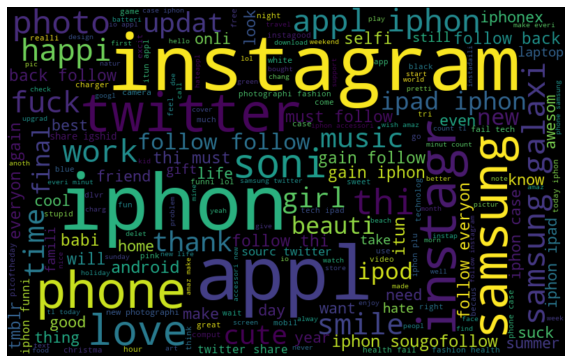

In [28]:
all_words =' '.join([text for text in combined_data['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height =500, random_state =21,max_font_size =110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the words are positive or netural.
## B)Positive words in the Tweets


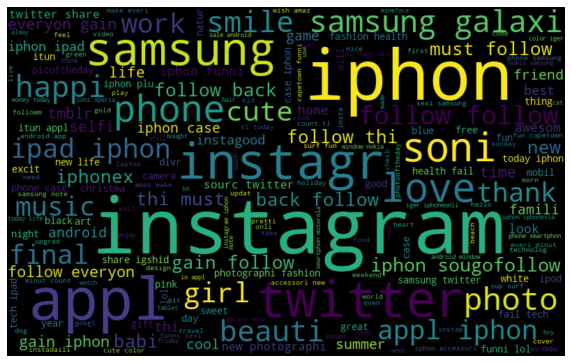

In [29]:
normal_words =' '.join([text for text in combined_data['tidy_tweet'][combined_data['label'] == 0]])
wordcloud = WordCloud(width =800, height =500,random_state =21, max_font_size =110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation ="bilinear")
plt.axis('off')
plt.show()

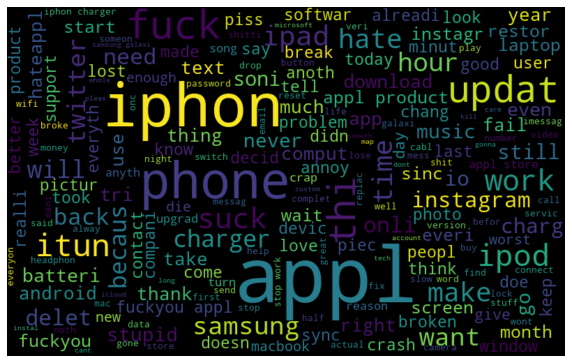

In [30]:
neg_words = ''.join([text for text in combined_data['tidy_tweet'][combined_data['label'] == 1]])
wordcloud = WordCloud(width =800,height =500, random_state =21, max_font_size =110).generate(neg_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation= "bilinear")
plt.axis('off')
plt.show()


D) Understand the impact of Hashtags on tweets sentiment

In [31]:
# function to collect the hashtags
def hashtag_extract(x):
    hashtags=[]
    #loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)" ,i)
        hashtags.append(ht)
        
    return hashtags
    
    

In [32]:
# extracting hashtags from positive Tweets

HT_regular = hashtag_extract(combined_data['tidy_tweet'][combined_data['label'] == 0])

#extracting hashtags from negative Tweets
HT_negative = hashtag_extract(combined_data['tidy_tweet'][combined_data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])



Now that we have prepared our lists of hashtags for both positive and negative sentiments, we can plot the top 'n' hashtags. so, first let's check the hashtags in the positive tweets.


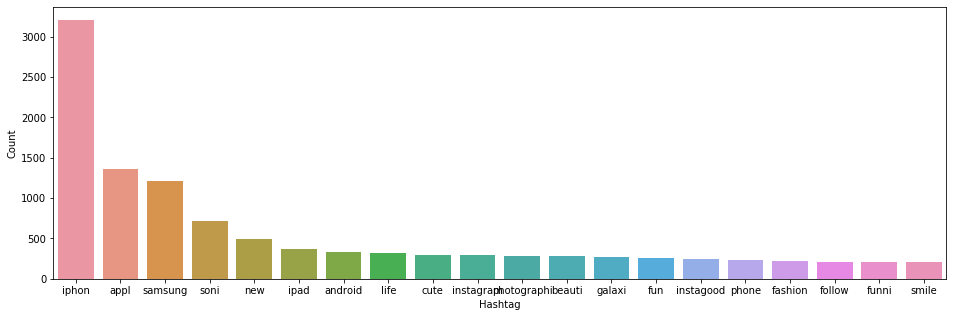

In [33]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

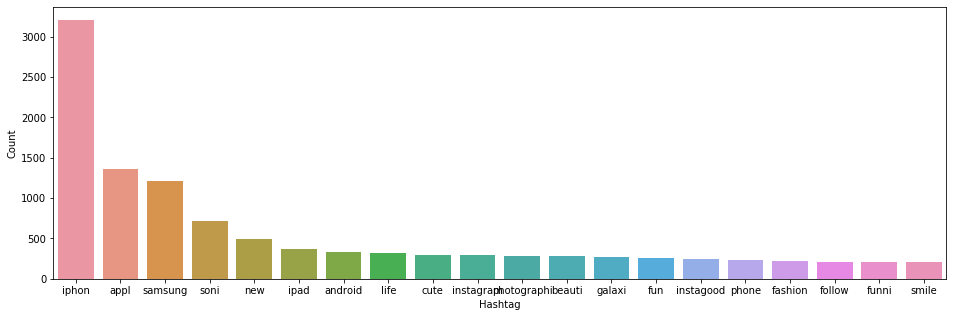

In [34]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns = "Count" , n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data = d, x ="Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


All these hashtags are positive and it make sense. I am expecting  negative terms in the plot of the second list.Let's check the most frequent hashtags appearing in the negative Tweets.


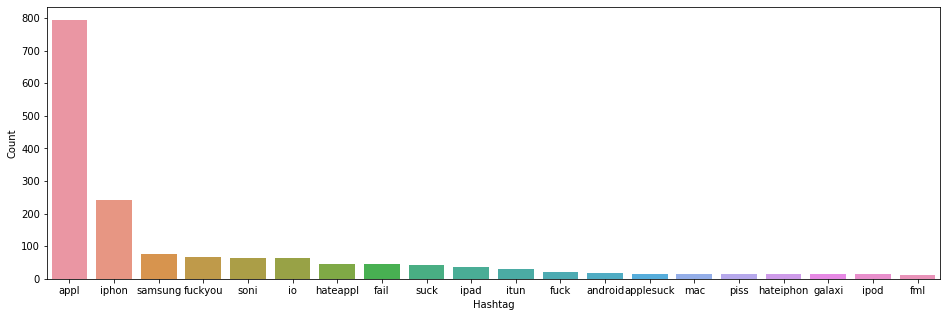

In [35]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),'Count':list(b.values())})

#selecting top 20 most frequent hashtags
e = e.nlargest(columns ="Count" , n =20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data = e, x = "Hashtag", y ="Count")

As expected , most of the terms are negative with a few netural terms aswell. so, it's not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

## Extracting features from Cleaned Tweets

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

## Bag of Words Feature

In [39]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combined_data['tidy_tweet'])
bow.shape

(9873, 1000)

In [40]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df =2, max_features =1000 ,stop_words ='english')
bow = bow_vectorizer.fit_transform(combined_data['tidy_tweet'])
bow.shape

(9873, 1000)

## TF-IDF Features

In [41]:
tfidf_vectorizer = TfidfVectorizer(max_df =0.90, min_df =2, max_features =1000, stop_words ='english')
tfidf =tfidf_vectorizer.fit_transform(combined_data['tidy_tweet'])
tfidf.shape

(9873, 1000)

## Word Embeddings

1.Word2Vec Embeddings

In [44]:
tokenized_tweet = combined_data['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(tokenized_tweet,
                                   size =200, # desired no of features/idependent variables
                                   window = 5,#context window size
                                   min_count = 2,
                                   sg =1 , # for skip-gram model
                                   hs =0,
                                   negative =10, # for ngative sampling
                                   workers = 2 , # no of cores
                                   seed = 34)
model_w2v.train(tokenized_tweet, total_examples = len(combined_data['tidy_tweet']) , epochs =20)

(1837645, 2567180)

In [45]:
model_w2v.wv.most_similar(positive = "dinner")

[('#filchi', 0.7385255694389343),
 ('achi', 0.7231942415237427),
 ('nephew', 0.7178077101707458),
 ('ofcours', 0.713076114654541),
 ('tess', 0.7076836824417114),
 ('#philippin', 0.7070796489715576),
 ('courtesi', 0.7068086862564087),
 ('#kinder', 0.7019266486167908),
 ('#dinner', 0.699656069278717),
 ('#backpack', 0.6990401744842529)]

In [46]:
len(model_w2v['food']) # the length of the vector is 200

200

Preparing Vectors for Tweets

We will use the below function to create a vector  for  each tweet  by talking the average of the vectors of the words present in the tweet.

In [47]:
def word_vector(tokens,size):
    vec = np.zeros(size).reshape((1,size))
    count =0.
    for word in tokens:
        
            try:
                vec += model_w2v[word].reshape(1,size)
                count += 1.
            except KeyError:
                    
                    continue
    if count !=0:
        vec/=count
    return vec

Preparing word2vec feature set...

In [48]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i],200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(9873, 200)

Now we have 200 features, where as Bag of Words and TF-IDF we had 1000 features.

2.Doc2Vec Embedding

Lets load the required libraries.

In [49]:
from tqdm import tqdm
tqdm.pandas(desc ="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\Users\Viswajani\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. we can do so by using gensim's LabeledSentence() function

In [50]:
def add_label(twt):
    output =[]
    for i,s in zip(twt.index, twt):
        output.append(LabeledSentence(s,["tweet_"+str(i)]))
    return output

In [51]:
labeled_tweets = add_label(tokenized_tweet)

In [52]:
labeled_tweets

[LabeledSentence(words=['#fingerprint', '#pregnanc', 'test', 'http', 'mfqv', '#android', '#app', '#beauti', '#cute', '#health', '#iger', '#iphoneonli', '#iphonesia', '#iphon'], tags=['tweet_0']),
 LabeledSentence(words=['final', 'transpar', 'silicon', 'case', 'thank', 'uncl', '#yay', '#soni', '#xperia', '#sonyexperia', 'http', 'instagram', 'yget'], tags=['tweet_1']),
 LabeledSentence(words=['love', 'thi', 'would', '#talk', '#makememori', '#unplug', '#relax', '#iphon', '#smartphon', '#wifi', '#connect', 'http', 'lsupcu'], tags=['tweet_2']),
 LabeledSentence(words=['wire', 'know', 'georg', 'made', 'that', '#iphon', '#cute', '#daventri', '#home', 'http', 'instagr'], tags=['tweet_3']),
 LabeledSentence(words=['what', 'amaz', 'servic', 'appl', 'even', 'talk', 'about', 'question', 'have', 'unless', 'them', 'their', 'stupid', 'support'], tags=['tweet_4']),
 LabeledSentence(words=['iphon', 'softwar', 'updat', 'fuck', 'phone', 'time', 'stupid', 'iphon'], tags=['tweet_5']),
 LabeledSentence(word

Now let's train a doc2vec model

In [53]:
model_d2v = gensim.models.Doc2Vec(dm =1, #dm =1 for 'distributed memory' model
                                  dm_mean = 1, # dm=1 for using mean of the context word vectors
                                  size = 200 , # no of desired features
                                  widow = 5 , # width of the context window
                                  negative = 7 ,# if > 0 then negative sampling will be used
                                  min_count =5 , # Ignores all words with total frequency lower than 2.
                                  workers = 3, # no.of cores 
                                  alpha =0.1, # learning rate
                                  seed =23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

C:\Users\Viswajani\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|█████████████████████████████████████████████████████████████████████████| 9873/9873 [00:00<00:00, 3265543.99it/s]


In [54]:
model_d2v.train(labeled_tweets, total_examples= len(combined_data['tidy_tweet']), epochs =15)

In [55]:
model_d2v

Preparing Doc2vec feature Set

In [63]:
docvec_arrays = np.zeros((len(tokenized_tweet),200))

for i in range(len(combined_data)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df =pd.DataFrame(docvec_arrays)
docvec_df.shape

(9873, 200)

In [57]:
# Model Building
# We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

# Logistic Regression
# Support Vector Machine
# RandomForest
# XGBoost

In [64]:
# Logistic Regression


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [67]:

train_bow = bow[:7920,:]
test_bow = bow[7920:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_data['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [68]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.8055749128919861

Now Let's make predictions for thr dataset and create a submission file


In [71]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_data['label'] = test_pred_int
submission = test_data[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

TF_IDF Features

In [80]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:, :]

Xtrain_tfidf = train_tfidf[ytrain.index]
Xvalid_tfidf =train_tfidf[yvalid.index]


In [85]:
lreg.fit(Xtrain_tfidf,ytrain)

prediction = lreg.predict_proba(Xvalid_tfidf)
prediction_int = prediction[:,1] >=0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid,prediction_int)

0.817234190410007

word2Vec Feature

In [ ]:

lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

In [87]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v =train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]


In [88]:
lreg.fit(xtrain_w2v,ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int =prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.8204419889502762

Doc2Vec Features

In [89]:
train_d2v =docvec_df.iloc[:31962,:]
test_d2v =docvec_df.iloc[31962:,:]


xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [92]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6243093922651933